## Custom CNN Model


       In below sections, implemented the custom cnn architecture using maxpool layer, BatchNormalization layers and  Convolutional layers, At the end of the layers, added sigmoid function for model classification. The main objective of this architecture to accurately detect the deep fake image using less number of convolutional layers.

**Step 1: Importing libraries**

In [1]:
import os, datetime
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from keras import regularizers
from keras.regularizers import l1
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 #for ignorning warning
import warnings
warnings.filterwarnings('ignore')

**Step 2:  Image Data Generator For Train dataset**

In [2]:
# Path of directory where image dataset is stored
base_path ='kaggle image/real-vs-fake/'

#Image data generator for reading train data images with batch size of 64.
image_gen = ImageDataGenerator(rescale=1./255.)

train_data = image_gen.flow_from_directory(
    base_path + 'train/',
    target_size=(224, 224),
    batch_size = 64,
    class_mode ='binary'
)
print("Training Data Classes :",train_data.class_indices)

Found 100000 images belonging to 2 classes.
Training Data Classes : {'fake': 0, 'real': 1}


**Step 3:  Image Data Generator For Valid dataset**

In [5]:
#Image data generator for reading validation data images with batch size of 64.
image_gen_valid = ImageDataGenerator(rescale=1./255.)

valid_data = image_gen_valid.flow_from_directory(
    base_path + 'valid/',
    target_size=(224, 224),
    batch_size= 64,
    class_mode = 'binary'
)
print("validation Data Classes :",valid_data.class_indices)

Found 20000 images belonging to 2 classes.
validation Data Classes : {'fake': 0, 'real': 1}


**Step 4:  Image Data Generator For Test dataset**

In [51]:
#Image data generators for reading test data image with batch size of 1.
image_gen_test = ImageDataGenerator(rescale=1./255.)

test_data = image_gen_test.flow_from_directory(
    base_path + 'test/',
    target_size=(224, 224),
    batch_size= 1,
    shuffle = False,
    class_mode = 'binary'
)
print("Test Dataset classes:",test_data.class_indices)

Found 20000 images belonging to 2 classes.
Test Dataset classes: {'fake': 0, 'real': 1}


**Step 5: Input Image Data Samples of Real and Fake class**

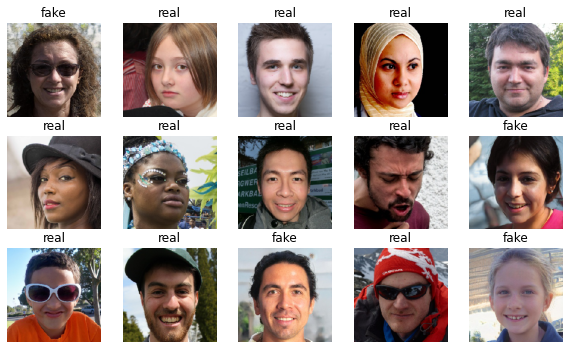

In [6]:
# Below are the image samples of real and fake images which looks exactly similar.
plt.figure(figsize=(10,10))
for i in range(15):
    img, label = train_data.next()
    ax = plt.subplot(5,5, i+ 1)
    plt.imshow(img[0])
    if (label[0]) == 0.0:
        plt.title("fake")
    else:
        plt.title("real")
    plt.axis('off')

**Step 6: Custom CNN Model Architecture**

In [7]:
#epsilon value for batchNormalization
epsilon_BN=0.001

#input shape of the image
input_shapes= (150, 150, 3)

#started Model building 
model = keras.Sequential()

# Convolutional layer and maxpool layer 1
model.add(keras.layers.BatchNormalization(input_shape=input_shapes))
model.add(keras.layers.Conv2D(8,(3,3),activation='relu', padding = "same"))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 2
model.add(keras.layers.BatchNormalization(epsilon=epsilon_BN))
model.add(keras.layers.Conv2D(16,(3,3),activation='relu', padding = "same"))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 3
model.add(keras.layers.BatchNormalization(epsilon=epsilon_BN))
model.add(keras.layers.Conv2D(32,(3,3),activation='relu', padding = "same" ))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 4
model.add(keras.layers.BatchNormalization(epsilon=epsilon_BN))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu',padding = "same" ))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 5
model.add(keras.layers.BatchNormalization(epsilon=epsilon_BN))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu',padding = "same" ))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 6
model.add(keras.layers.BatchNormalization(epsilon=epsilon_BN))
model.add(keras.layers.Conv2D(256,(3,3),activation='relu',padding = "same" ))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.GlobalAveragePooling2D())

# This layer flattens the resulting image array to 1D array
model.add(keras.layers.Flatten())

#Applied Sigmoid function to perform classification task.
model.add(keras.layers.Dense(1, activation='sigmoid'))


2022-09-06 21:32:26.826934: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-06 21:32:29.310229: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 30998 MB memory:  -> device: 0, name: NVIDIA Tesla V100-SXM2-32GB, pci bus id: 0000:61:00.0, compute capability: 7.0
2022-09-06 21:32:29.311742: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 30998 MB memory:  -> device: 1, name: NVIDIA Tesla V100-SXM2-32GB, pci bus id: 0000:62:00.0, compute capability: 7.0
2022-09-06 21:32:29.313144: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/r

**Step 7: Defining Model Compiler**

In [8]:
# We are calculating loss, using binar cross entropy and utilizing Adam optimizer for loss optimization and also using 
# Binary accuracy metric for accuracy. 

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics = [keras.metrics.BinaryAccuracy()])

**Step 8: Model is learning from train data in specified number of steps.**

In [9]:
#Below defined the no of epochs and step per epoch for model training and validation steps for hyperparameter tuning.
steps_per_epoch =  50000//64 
validations_steps = 3000//64

history = model.fit_generator(train_data,
                    epochs = 10,
                    steps_per_epoch = steps_per_epoch,
                    validation_data = valid_data,
                    validation_steps = validations_steps)
       

2022-09-06 21:32:43.875987: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-09-06 21:32:46.148337: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8101
2022-09-06 21:32:46.673753: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-09-06 21:32:46.674612: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-09-06 21:32:46.674634: W tensorflow/stream_executor/gpu/asm_compiler.cc:77] Couldn't get ptxas version string: Internal: Couldn't invoke ptxas --version
2022-09-06 21:32:46.675992: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-09-06 21:32:46.676272: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


781/781 [==============================] - 501s 637ms/step - loss: 0.5093 - binary_accuracy: 0.7476 - val_loss: 0.3847 - val_binary_accuracy: 0.8261
Epoch 2/10
781/781 [==============================] - 334s 427ms/step - loss: 0.2868 - binary_accuracy: 0.8768 - val_loss: 0.2581 - val_binary_accuracy: 0.8882
Epoch 3/10
781/781 [==============================] - 262s 336ms/step - loss: 0.1841 - binary_accuracy: 0.9265 - val_loss: 0.1560 - val_binary_accuracy: 0.9341
Epoch 4/10
781/781 [==============================] - 200s 256ms/step - loss: 0.1348 - binary_accuracy: 0.9482 - val_loss: 0.1405 - val_binary_accuracy: 0.9436
Epoch 5/10
781/781 [==============================] - 187s 239ms/step - loss: 0.1064 - binary_accuracy: 0.9586 - val_loss: 0.1540 - val_binary_accuracy: 0.9399
Epoch 6/10
781/781 [==============================] - 181s 232ms/step - loss: 0.0874 - binary_accuracy: 0.9665 - val_loss: 0.1249 - val_binary_accuracy: 0.9514
Epoch 7/10
781/781 [==============================]

**Step 9: Saving the model**

In [10]:
#saving the trained model. 
model.save('Custom-model-architecture.h5')

**Step 10: Defining Function for plotting accuracy and loss**

In [48]:
# using below finction, we plotting accuracy,validation accuracy and also loss and validation loss for performing analysis.
def accuracy_graph(no_of_epochs, accuracy, val_accuracy):
    
    fig, ax = plt.subplots(figsize=(8,5))
    ax.set(facecolor = "black")
    ax.plot(no_of_epochs, acc, 'blue', linewidth=1, marker='o', label='Training accuracy')
    ax.plot(no_of_epochs, val_acc, 'orange', linewidth=1, marker='o', label = 'Validation accuracy')
    ax.set_title('Training and Validation Accuracy using Custom CNN Model')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Accuracy')
    ax.legend()
    plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
    plt.show()

    

def loss_graphs(no_of_epochs, loss, val_loss): 
    fig, ax = plt.subplots(figsize=(8,5))
    ax.set(facecolor = "black")
    ax.plot(no_of_epochs, loss, 'blue', linewidth=1, marker='o', label='Training Loss')
    ax.plot(no_of_epochs, val_loss, 'orange', linewidth=1, marker='o', label = 'Validation Loss')
    ax.set_title('Training and Validation Loss using Custom CNN Model')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.legend()
    plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
    plt.show()

**Step 11: Storing Train and Validation set accuracy and loss**

In [46]:
# In below section, storing the training accuracy,validation acuuracy and loss , validation loss from history variable 
# where actually stored the model output.

accuracy = history.history['binary_accuracy']
val_accuracy = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

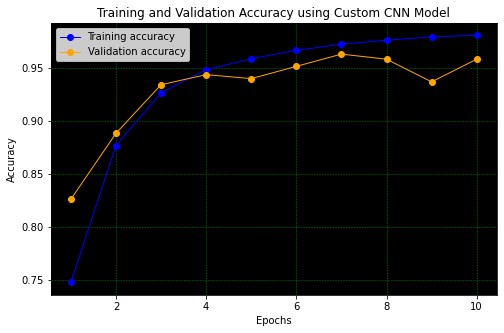

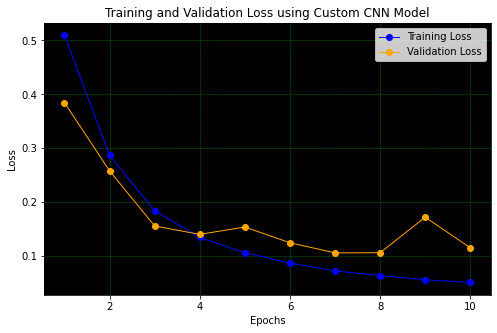

In [53]:
# calling the above defined function for plotting loss and accuracy.
accuracy_graph(range(1, len(loss) + 1), acc, val_acc)
loss_graphs(range(1, len(loss) + 1), loss, val_loss)

**Step 12: Calculating Prediction using trained model on Test Data set**

In [52]:
#We are using same trained model, for predicting labels of test image data.
y_pred = model.predict(test_data)
y_test = test_data.classes

**Step 13: Classification Report**

In [56]:
#for model evaluation, using classfication report which shows, precision, recall, F1-score.

from sklearn import metrics
print(metrics.classification_report(y_test, y_pred> 0.5))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     10000
           1       0.98      0.95      0.96     10000

    accuracy                           0.96     20000
   macro avg       0.96      0.96      0.96     20000
weighted avg       0.96      0.96      0.96     20000



**Step 14: Confusion Matrix result**

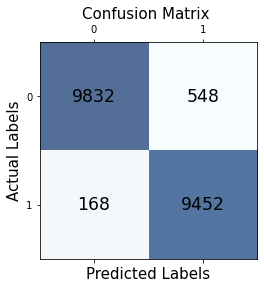

In [67]:
#Also plotting confusion matrix, for checking True positive, True Negative , False positive and False negative values based
# on the model prediction

Confusion_matrix = metrics.confusion_matrix(y_test, y_pred> 0.5)
fig, px = plt.subplots(figsize=(4, 4))
px.matshow(Confusion_matrix, cmap=plt.cm.Blues, alpha = 0.7)
for row in range(Confusion_matrix.shape[0]):
    for col in range(Confusion_matrix.shape[1]):
        px.text(x=row,y=col,s=Confusion_matrix[row, col], va='center', ha='center', size='xx-large')
plt.xlabel('Predicted Labels', fontsize=15)
plt.ylabel('Actual Labels', fontsize=15)
plt.title('Confusion Matrix ', fontsize=15)
plt.show()

**Code References:**

1.	https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
2.	https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization
3.	https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D
4.	https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D
5.	https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D
6.	https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalAveragePooling2D
7.	https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten
8.	https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense
9.	https://www.tensorflow.org/api_docs/python/tf/keras/models/save_model
10.	https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
11.	https://www.kaggle.com/code/zohaib30/fake-vs-real-tensorflow-keras
12. https://keras.io/api/applications/densenet/
13. https://keras.io/api/applications/inceptionv3/
